**NASA-Sloan Atlas **

Using NSA catalog to look for filaments around Virgo.

** WISE **

Using WISE catalog to select the star-forming galaxies.  Some of the WISE columns are described here:

    http://wise2.ipac.caltech.edu/docs/release/allwise/expsup/sec3_1a.html
    
    
It looks like the mpro values are upper limits if SNR < 2.

** Coordinates of M87 and M101 **

Good to plot these positions along with other galaxies.

** Things to do:  **

* match alpha 70 to AGC
* get SDSS diameters for NSA galaxies so that we can calculate HI Def
* calculate HI Def for all AGC.70 galaxies
* calculate environment for all AGC.70 galaxies


In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import warnings
warnings.filterwarnings('ignore')

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [40]:
def findnearest(x1,y1,x2,y2,delta):#use where command
    matchflag=1
    nmatch=0
    d=np.sqrt((x1-x2)**2 + (y1-y2)**2)#x2 and y2 are arrays
    index=np.arange(len(d))
    t=index[d<delta]
    matches=t
    if len(matches) > 0:
        nmatch=len(matches)
        if nmatch > 1:
            imatch=index[(d == min(d[t]))]
        else:
            imatch=matches[0]
    else:
        imatch = 0
        matchflag = 0

    return imatch, matchflag,nmatch


In [2]:
nsafile='/Users/rfinn/research/NSA/nsa_v0_1_2.fits'
nsa=fits.getdata(nsafile)

In [3]:
# read in WISE catalog
wisefile='/Users/rfinn/research/NSA/nsa_v0_1_2_wise.fits'
wise=fits.getdata(wisefile)

In [4]:
# read in John's stellar masses
massfile='/Users/rfinn/research/NSA/nsa_v1_2_fsps_v2.4_miles_chab_charlot_sfhgrid01.fits'
jmass=fits.getdata(massfile)

In [5]:
# select galaxies near Virgo
raflag = (nsa.RA > 150.) & (nsa.RA < 220.) 
decflag= (nsa.DEC > -10.) & (nsa.DEC < 50.) 
velflag = (nsa.Z*3.e5 > 1000.) & (nsa.Z*3.e5 < 3000.)
vflag = raflag & decflag & velflag
vra=187.69708
vdec=12.33694
rad_distance = np.sqrt((nsa.RA - vra)**2+(nsa.DEC-vdec)**2)

## Write Out Files That Contain Virgo Region Only

The following fits tables will only have the NSA galaxies that are in the vicinity of Virgo.

In [33]:
nsaagcfile='/Users/rfinn/research/NSA/nsa_v0_1_2_with_AGC_fitsbasic.fits'
nsa_agc=fits.getdata(nsaagcfile)

#this contains columns from both the NSA and the AGC catalogs
fits.writeto('/Users/rfinn/Dropbox/Research/ISSI/nsa_v0_1_2_with_AGC.Virgo.fits',nsa_agc[vflag],clobber=True)

# just contains wise columns, line-matched to above table
fits.writeto('/Users/rfinn/Dropbox/Research/ISSI/nsa_v0_1_2_wise.Virgo.fits',wise[vflag],clobber=True)


## DEC vs RA, Color-coded by Recession Velocity

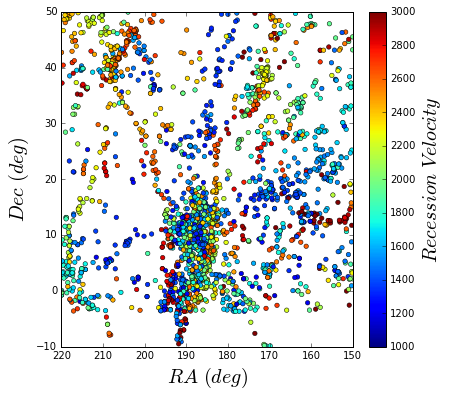

In [34]:
fig=plt.figure(figsize=(6,6))
plt.scatter(nsa.RA[vflag],nsa.DEC[vflag],c=nsa.ZDIST[vflag]*3.e5,s=20,vmin=1000,vmax=3000,lw=0.5)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
# global area of interest
ra_min=192
dec_min=17
dra=20
ddec=32
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='k',lw=3)
#fig.gca().add_artist(rect)
cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
#plt.title('NASA-Sloan Atlas Galaxies in the Vicinity of Virgo')
plt.savefig('Virgo_positions.png')

## WISE 22um Sources

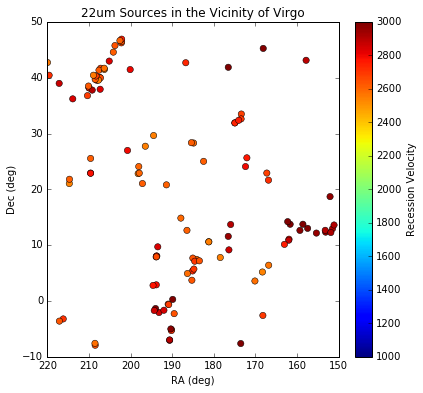

In [35]:
# make same plot, but just show 22um detections
velflag = (nsa.Z*3.e5 > 2515.) & (nsa.Z*3.e5 < 3000.)
wflag = vflag & (wise.W4MPRO > 0.1) & (wise.W4SNR > 4.) & velflag
plt.figure(figsize=(6,6))
plt.scatter(nsa.RA[wflag],nsa.DEC[wflag],c=nsa.ZDIST[wflag]*3.e5,s=40,vmin=1000,vmax=3000,lw=0.5)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
plt.colorbar(fraction=.08,label='Recession Velocity')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('22um Sources in the Vicinity of Virgo')
plt.savefig('Virgo_positions_22um_sources.png')

## Redshift Distribution

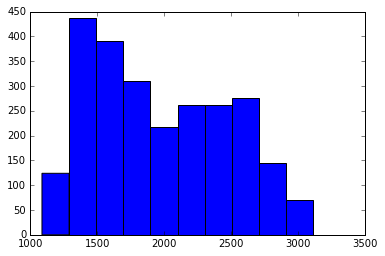

In [36]:
plt.figure()
t=plt.hist(nsa.ZDIST[vflag]*3.e5)

## WISE 12um Sources

number of galaxies with 12um detections =  1229


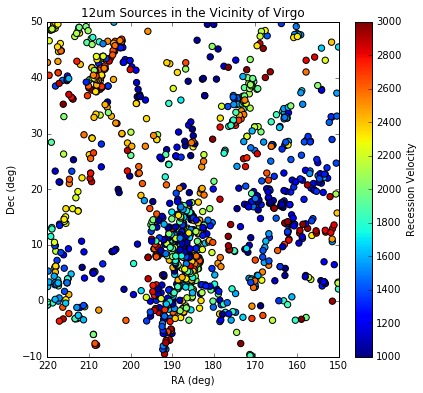

In [38]:
# make same plot, but just show 12um detections
wflag = vflag & (wise.W3MPRO > 0.) & (wise.W3SNR > 2.) 
print 'number of galaxies with 12um detections = ',sum(wflag)
plt.figure(figsize=(6,6))
plt.scatter(nsa.RA[wflag],nsa.DEC[wflag],c=nsa.Z[wflag]*3.e5,s=40,vmin=1000,vmax=3000)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
plt.colorbar(fraction=.08,label='Recession Velocity')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('12um Sources in the Vicinity of Virgo')
plt.savefig('Virgo_positions_12um_sources.png')

## ALFALFA Sources

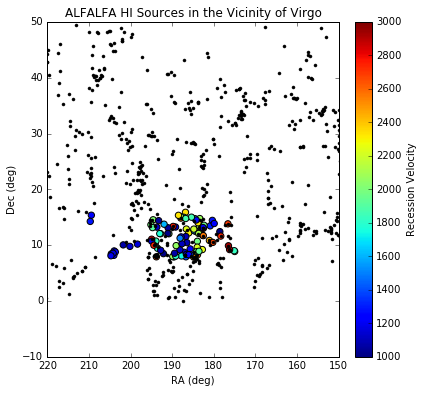

In [39]:
# make same plot, but just show HI detections
wflag = vflag & (nsa.IALFALFA > -1) 
plt.figure(figsize=(6,6))
plt.scatter(nsa.RA[wflag],nsa.DEC[wflag],c=nsa.Z[wflag]*3.e5,s=40,vmin=1000,vmax=3000)
# add positions from a.70 catalog
agc=fits.getdata('/Users/rfinn/research/AGC/agctotal.fits')
aflag = (((agc.VOPT > 2400.) & (agc.VOPT < 3000.)) | ((agc.V21 > 2400.) & (agc.V21 < 3000.)) ) & (agc.FLUX100 > 0.1)
plt.plot(agc.RA[aflag],agc.DEC[aflag],'k.')
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
plt.colorbar(fraction=.08,label='Recession Velocity')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')


plt.title('ALFALFA HI Sources in the Vicinity of Virgo')
plt.savefig('Virgo_positions_HI_sources.png')

ALFALFA 40% data release does not include much of large-scale structure around Virgo.  The survey should go from 0 < DEC < 36, so we should have many more detections.  I will check to see if this region is contained in the 70% data release.

## CFHT Sample

We select all NSA galaxies with:

* $ 2400 < v_r < 2800$
* WISE 22um $SNR > 4$
* $9 < \log_{10}(M/M_\odot) < 10$
* $182^\circ < RA < 202^\circ$
* $ 1^\circ < DEC < 33^\circ$

number of galaxies in sample =  22


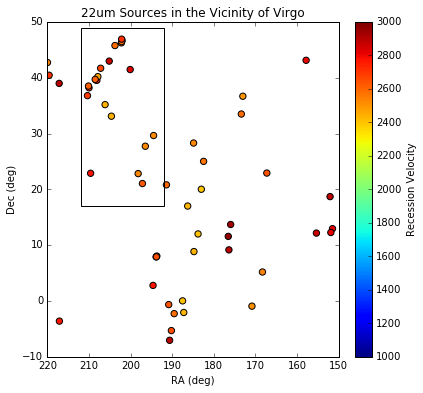

In [41]:
# make same plot, but just show 22um detections
wiseflag = (wise.W4MPRO > 0.1) & (wise.W4SNR > 4.) 
mflag = (jmass.MSTAR_50 > 9.) & (jmass.MSTAR_50 < 10.)
wflag = vflag & wiseflag & mflag &(nsa.Z*3.e5 > 2400.) & (nsa.ZDIST*3.e5 < 3000.) 
fig=plt.figure(figsize=(6,6))
plt.scatter(nsa.RA[wflag],nsa.DEC[wflag],c=nsa.Z[wflag]*3.e5,s=40,vmin=1000,vmax=3000)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
plt.colorbar(fraction=.08,label='Recession Velocity')
# global area of interest
ra_min=192
dec_min=17
dra=20
ddec=32
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='k')
fig.gca().add_artist(rect)
inbox= (abs(nsa.RA - (ra_min + dra/2.)) < dra/2.) & (abs(nsa.DEC - (dec_min+ddec/2.)) < ddec/2.)
sample = wflag & inbox
print 'number of galaxies in sample = ',sum(sample)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('22um Sources in the Vicinity of Virgo')
plt.savefig('Virgo_positions_22um_sources.png')




['J134845.16+414235.3', 'J134835.47+432428.8', 'J135209.79+431434.6', 'J135301.89+393450.8', 'J135224.87+393327.4', 'J135125.37+401247.7', 'J132849.76+461544.6', 'J132810.05+464019.7', 'J132833.65+462959.7', 'J132833.19+465537.8', 'J140124.02+364800.3', 'J135957.09+381203.3', 'J132256.47+281859.1', 'J130834.27+210259.9', 'J131241.78+224947.2', 'J134031.19+425938.0', 'J134428.40+351131.9', 'J135359.49+394256.0', 'J133825.19+330702.9', 'J140025.00+383113.0']
recession velocities:
[ 2669.73144531  2371.24633789  2336.22021484  2503.13012695  2752.07617188
  2470.41967773  2621.96899414  2418.73120117  2561.28564453  2719.69213867
  2694.99023438  2719.89086914  2390.85546875  2630.82617188  2531.82055664
  2870.57836914  2439.69140625  2614.81298828  2439.69140625  2620.45214844]


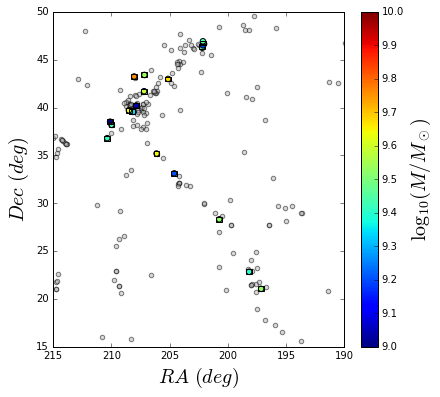

In [42]:
# zoom in on sources to target
fig=plt.figure(figsize=(6,6))
plotflag = (nsa.ZDIST*3.e5 > 2400.) & (nsa.ZDIST*3.e5 < 3000.)

plt.scatter(nsa.RA[plotflag],nsa.DEC[plotflag],c='0.7',alpha=.5)
plt.axis([190,215,15,50])
# visual inspection of sdss image and spectra
# shows that J135359.49+394256.0 is a red passive galaxies
# so I'm removing this from sample
COnames=['J134845.16+414235.3','J134835.47+432428.8','J135209.79+431434.6',
         'J135301.89+393450.8','J135224.87+393327.4','J135125.37+401247.7',
         'J132849.76+461544.6','J132810.05+464019.7','J132833.65+462959.7',
         'J132833.19+465537.8','J140124.02+364800.3','J135957.09+381203.3',
         'J132256.47+281859.1','J130834.27+210259.9','J131241.78+224947.2',
         'J134031.19+425938.0','J134428.40+351131.9','J135359.49+394256.0',
         'J133825.19+330702.9','J140025.00+383113.0']
#allgalnames=np.array(['J134845.16+414235.3', 'J134835.47+432428.8', 'J135209.79+431434.6',
#       'J135301.89+393450.8', 'J135224.87+393327.4', 'J135125.37+401247.7',
#       'J132021.28+412833.9', 'J132849.76+461544.6', 'J132810.05+464019.7',
#       'J132833.65+462959.7', 'J132833.19+465537.8', 'J140124.02+364800.3',
#       'J135957.09+381203.3', 'J132256.47+281859.1', 'J131432.94+352305.3',
#       'J135505.04+325411.2', 'J130547.56+274402.9', 'J130834.27+210259.9',
#       'J131241.78+224947.2', 'J134031.19+425938.0', 'J134428.40+351131.9',
#       'J135359.49+394256.0', 'J125749.69+293917.0', 'J133458.10+454645.0',
#       'J133825.19+330702.9', 'J135822.69+225313.9', 'J140025.00+383113.0'])
mask = np.array([1,1,1,
                 1,1,1,
                 0,1,1,
                 1,1,1,
                 1,1,0,
                 0,0,1,
                 1,1,1,
                 0,0,1,
                 1,0,1],'bool')
#galnames=allgalnames[mask]
galnames = COnames
print galnames
nameflag = np.zeros(len(nsa.RA),'bool')
for g in galnames:
    nameflag[nsa.IAUNAME == g] = True
finalflag=wflag & (nameflag)
finalflag = nameflag
plt.scatter(nsa.RA[finalflag],nsa.DEC[finalflag],c=jmass.MSTAR_50[finalflag],s=30,vmin=9,vmax=10)

cb=plt.colorbar(fraction=.08)
cb.set_label('$\log_{10}(M/M_\odot)$',size=20)
# plot Mosaic field of view for each galaxy
# how many pointing are required?

## for Halpha proposal
#plt.scatter(nsa.RA[wflag],nsa.DEC[wflag],c=jmass.MSTAR_50[wflag],s=30,vmin=9,vmax=10,marker='o')
ra = nsa.RA[finalflag]
dec = nsa.DEC[finalflag]
vr = nsa.Z[finalflag]*3.e5
print 'recession velocities:'
print vr
##
for i in range(len(ra)):
    #rect= plt.Rectangle((ra[i]-.25,dec[i]-.25), 1, 1,fill=False, color='k')
    rect= plt.Rectangle((ra[i]-.25,dec[i]-.25), .5, .5,fill=False, color='k')
    #fig.gca().add_artist(rect)

plt.axis([190,215,15,50])
#plt.axis([200,203,45,49])
#plt.axis([205,210,36,43])
#plt.axis([200,212,30,50])
plt.gca().invert_xaxis()
#plt.axhline(y=37)
#plt.axhline(y=41)
#plt.axhline(y=46)

# this was for Halpha proposal

plotrectangle = (dec < 35.) #| ((dec > 41) & (dec < 46))
propra=[]
propdec=[]
#for i in range(len(ra)):
#    if plotrectangle[i]:
#        #print 'plotting a rectangle!'
#        rect= plt.Rectangle((ra[i]-.5,dec[i]-.5), 1, 1,fill=False, color='k')
#        fig.gca().add_artist(rect)
#        #print ra[i],dec[i]
#        propra.append(ra[i])
#        propdec.append(dec[i])
pointing_ra=np.array([202.2,208.2,210.0,208.,210.2,206.9,207.2,204.2,203.8,208.,205.,207.2,203.8])
pointing_dec=np.array([46.6, 39.9, 38.3,37.8,  37., 43.7, 40.2, 44.6,  46.,43.4,42.7, 41.7, 32.])
#print ra

#print dec
# NOAO 2017A
pointing_ra=np.array([202.2,208.2,210.0,208.,210.2,206.9,207.2,204.2,203.8,208.,205.,207.2,203.8])
pointing_dec=np.array([46.6, 39.9, 38.3,37.8,  37., 43.7, 40.2, 44.6,  46.,43.4,42.7, 41.7, 32.])
pointing_ra= np.array([207.18818271,  207.16250436,  208.04087548,  208.25791236,  #208.10368713,
  207.85571539,  202.12,202.21,#202.20737037,  202.04191831,  202.14026496,  202.13872261,
  210.35010411,  209.98796358,  200.73515356,  197.14297424,  198.17416984,
  205.12403238,  206.11823762,  208.49807953,  204.60202328,  210.10544683])
pointing_dec = np.array([41.70990627,  43.41226634,  43.24298623,  39.58080927,  #39.55761506,
  40.21324085,  46.75,46.4,#46.26238425,  46.67210541,  46.49991518,  46.9271747,
  36.80006669,  38.20092964,  28.3164212 ,  21.04971393,  22.82982137,
  42.99272282,  35.1925887,   39.71548573,  33.11787334,  38.52075771])

for i in range(len(pointing_ra)):
#for i in range(len(ra)):
    #rect= plt.Rectangle((pointing_ra[i]-.5,pointing_dec[i]-.5), 1, 1,fill=False, color='k')
    rect= plt.Rectangle((pointing_ra[i]-.25,pointing_dec[i]-.25), .5, .5,fill=False, color='k')
    #rect= plt.Rectangle((ra[i]-.25,dec[i]-.25), .5, .5,fill=False, color='k')
    fig.gca().add_artist(rect)
    propra.append(ra[i])
    propdec.append(dec[i])
    
plt.xlabel('$RA \ (deg)$',fontsize=20)
plt.ylabel('$Dec  \ (deg)$',fontsize=20)
#plt.axis([201,204,45,48])
#plt.title('22um Sources in the NE Filament')
plt.savefig('Virgo_filament_CO_obs.pdf')
plt.savefig('Virgo_filament_CO_obs.png')



## Calculations for Observing Proposals ##

In [3]:
# INT filter
print 'INT filter Halpha'
lambda_rest = 6563.
ha4_lambda = 6657.52
ha4_width = 79.
lambda_min = ha4_lambda - 0.5*ha4_width
lambda_max = ha4_lambda + 0.5*ha4_width
vr_min = (lambda_min - lambda_rest)/lambda_rest*3.e5
print 'vr min = ',vr_min
vr_max = (lambda_max - lambda_rest)/lambda_rest*3.e5
print 'vr min = ',vr_max

INT filter Halpha
vr min =  2515.00838031
vr min =  6126.16181624


In [2]:
# INT filter
print 'INT filter'
lambda_rest = 6563.
ha4_lambda = 6568.52
ha4_width = 95.
lambda_min = ha4_lambda - 0.5*ha4_width
lambda_max = ha4_lambda + 0.5*ha4_width
vr_min = (lambda_min - lambda_rest)/lambda_rest*3.e5
print 'vr min = ',vr_min
vr_max = (lambda_max - lambda_rest)/lambda_rest*3.e5
print 'vr min = ',vr_max

INT filter
vr min =  -1918.93950937
vr min =  2423.58677434


In [1]:
# I think this is the Halpha + 4nm filter at KPNO
lambda_rest = 6563.
ha4_lambda = 6620.52
ha4_width = 80.48
lambda_min = ha4_lambda - 0.5*ha4_width
lambda_max = ha4_lambda + 0.5*ha4_width
vr_min = (lambda_min - lambda_rest)/lambda_rest*3.e5
print 'vr min = ',vr_min
vr_max = (lambda_max - lambda_rest)/lambda_rest*3.e5
print 'vr max = ',vr_max

vr min =  789.882675606
vr max =  4468.68809995


In [44]:
for name in COnames:
    z = nsa.Z[nsa.IAUNAME == name]*3.e5
    if (z > 2423.) & (z < 2515.0):
        print "can't observe ",name
    

can't observe  J135301.89+393450.8
can't observe  J135125.37+401247.7
can't observe  J134428.40+351131.9
can't observe  J133825.19+330702.9


In [ ]:
# scale 0.9 m observing times to INT 2.5 m
tha = 1.5*60 # min
tR = 15. # min
tha_INT = tha*(.9/2.5)**2
tR_INT = tR*(.9/2.5)**2
print 'halpha total time = ',tha_INT
print 'R total time = ',tR_INT

In [ ]:
# estimating 
z=vr/3.e5
#print z
#print vr
print 'total time = ',2.5*17
print 'number of nights = ',(2.5*17+2.5)/8.
distance = np.mean(vr)/70.*3.e24 # convert vr to cm
flux = 3.e-17 # erg/s/cm^2/arcsec^2
lum = flux * 4*np.pi*distance**2
lum = lum * np.pi*(30.)**2
print lum
SFR = lum*7.9e-42
print 'SFR sb limit = ',SFR

print 'SFR to flux'
sfr = .25
lum = sfr/7.9e-42
flux = lum/(4.*np.pi*distance**2)
# divide by surface area of galaxy
flux = flux/(np.pi*(30./.45)**2)
print 'flux = ',flux

In [ ]:
propra=np.array(propra)
propdec=np.array(propdec)
#for i in range(len(propra)): print propra[i],propdec[i]
#print coords
c=SkyCoord(ra=propra*u.degree,dec=propdec*u.degree)
#for i in range(len(propra)): print c[i].ra.deg,c[i].dec.deg

In [ ]:
#couldn't figure out format required for NOAO observation table so had to enter them by hand :(  
for i in range(len(ra)):
    print '%i, %s14, %12.8f, %12.8f, J2000, 14, Halpha4, 1800, 3, 7, phot, 2, N/C'%(i,COnames[i], ra[i],dec[i])

## Match CO Sources to ALFALFA a.70

In [45]:
sum(finalflag)
for i in range(len(nsa.RA)):
    if finalflag[i]:
        t=findnearest(nsa.RA[i],nsa.DEC[i],agc.RA,agc.DEC,10./3600.)
        if t[1] == 1:
            agcindex=t[0]
            if agc.FLUX100[agcindex] > 0: #calculate HI mass
                massHI = 2.36e5*agc.FLUX100[agcindex]/100.*(nsa.ZDIST[i]*3.e5/70.)**2
            else:
                massHI=1
            print '%s: HI flux = %5.2f, log10(HI mass) = %5.2f'%(nsa.IAUNAME[i],agc.FLUX100[agcindex]/100.,np.log10(massHI))
        else:
            print nsa.IAUNAME[i], 'no match in AGC'

J134845.16+414235.3: HI flux =  0.00, log10(HI mass) =  0.00
J134835.47+432428.8: HI flux = 19.51, log10(HI mass) =  9.75
J135209.79+431434.6: HI flux =  9.88, log10(HI mass) =  9.44
J135301.89+393450.8: HI flux =  4.29, log10(HI mass) =  9.12
J135224.87+393327.4: HI flux =  0.00, log10(HI mass) =  0.00
J135125.37+401247.7 no match in AGC
J132849.76+461544.6: HI flux =  0.00, log10(HI mass) =  0.00
J132810.05+464019.7: HI flux = 16.29, log10(HI mass) =  9.70
J132833.65+462959.7: HI flux =  0.00, log10(HI mass) =  0.00
J132833.19+465537.8: HI flux =  5.58, log10(HI mass) =  9.31
J140124.02+364800.3 no match in AGC
J135957.09+381203.3: HI flux =  0.00, log10(HI mass) =  0.00
J132256.47+281859.1: HI flux = 10.51, log10(HI mass) =  9.47
J130834.27+210259.9: HI flux =  7.45, log10(HI mass) =  9.39
J131241.78+224947.2 no match in AGC
J134031.19+425938.0: HI flux =  0.00, log10(HI mass) =  0.00
J134428.40+351131.9: HI flux =  7.19, log10(HI mass) =  9.32
J135359.49+394256.0: HI flux =  0.00, 

## Coordinates of MegaCam Pointings

In [ ]:
# copied this into target list on proposal web form
#for i in range(len(propra)):
#    print 'Pointing',i+1, c[i].ra.to_string(unit='hour',sep=':',precision=2), c[i].dec.to_string(unit='deg',sep=':',precision=1)
for i in range(len(ra)):
    print 'Pointing',i+1, c[i].ra.to_string(unit='hour',sep=':',precision=2), c[i].dec.to_string(unit='deg',sep=':',precision=1)

## SDSS Image Cutouts

The following will create a list to feed into

http://skyserver.sdss.org/dr12/en/tools/chart/listinfo.aspx

In [46]:
k=1
for i in range(len(nsa.RA)):
    
    if finalflag[i]:
        print '%s %i %12.6f %12.6f'%(nsa.IAUNAME[i],nsa.NSAID[i],nsa.RA[i],nsa.DEC[i])
        k += 1

J134845.16+414235.3 54578   207.188183    41.709906
J134835.47+432428.8 54612   207.162504    43.412266
J135209.79+431434.6 54619   208.040875    43.242986
J135301.89+393450.8 56456   208.257912    39.580809
J135224.87+393327.4 56462   208.103687    39.557615
J135125.37+401247.7 56478   207.855715    40.213241
J132849.76+461544.6 61674   202.207370    46.262384
J132810.05+464019.7 61691   202.041918    46.672105
J132833.65+462959.7 61692   202.140265    46.499915
J132833.19+465537.8 61693   202.138723    46.927175
J140124.02+364800.3 67567   210.350104    36.800067
J135957.09+381203.3 67595   209.987964    38.200930
J132256.47+281859.1 88353   200.735154    28.316421
J130834.27+210259.9 118647   197.142974    21.049714
J131241.78+224947.2 119289   198.174170    22.829821
J134031.19+425938.0 143758   205.124032    42.992723
J134428.40+351131.9 143827   206.118238    35.192589
J135359.49+394256.0 144043   208.498080    39.715486
J133825.19+330702.9 163803   204.602023    33.117873
J14002

In [47]:
print jmass.MSTAR_50[nsa.IAUNAME == 'J133458.10+454645.0']
print jmass.MSTAR[nsa.IAUNAME == 'J133458.10+454645.0']

[ 9.02217865]
[ 8.96055698]


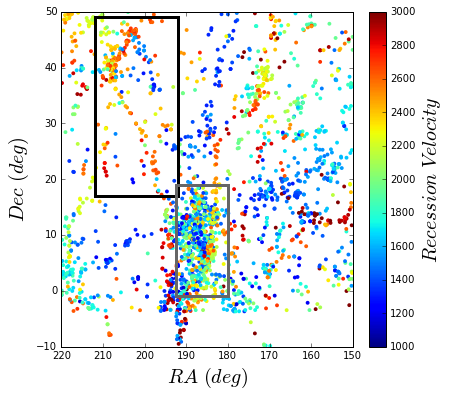

In [48]:
fig=plt.figure(figsize=(6,6))
plt.scatter(nsa.RA[vflag],nsa.DEC[vflag],c=nsa.ZDIST[vflag]*3.e5,s=15,vmin=1000,vmax=3000,lw=0.)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
# global area of interest
ra_min=192
dec_min=17
dra=20
ddec=32
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='k',lw=3)
fig.gca().add_artist(rect)
cb=plt.colorbar(fraction=.08)

# Boselli rectangle
ra_min=180
dec_min=-1
dra=12.5
ddec=20
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='0.4',lw=3)
fig.gca().add_artist(rect)
#cb=plt.colorbar(fraction=.08)

#for i in range(len(propra)):
#    rect= plt.Rectangle((c[i].ra.deg-.5,c[i].dec.deg-.5), 1, 1,fill=False, color='k')
#    fig.gca().add_artist(rect)

cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
#plt.title('NASA-Sloan Atlas Galaxies in the Vicinity of Virgo')
plt.savefig('Virgo_positions.png')

## Estimated SFRs of Target Galaxies 

## Color-Color Plot ##

plot NUV-r vs r-24 colors for virgo galaxies

In [19]:
wise.W4MPRO 

array([ 7.836,  9.019,  9.184, ...,  8.286,  0.   ,  8.663])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


[-5, 3.5, 0, 7]

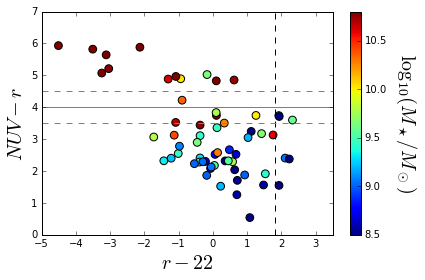

In [20]:
# NUV - r color
filament = (nsa.RA > 192.) & (nsa.RA < 212) & (nsa.DEC > 17.) & (nsa.DEC < 49.) & (nsa.Z*3.e5 >2400.) & (nsa.Z*3.e5 < 3000.)
nsa.nsamag=22.5-2.5*np.log10(nsa.NMGY)

NUVr=nsa.ABSMAG[:,1] - nsa.ABSMAG[:,4]

wiseflag = (wise.W4MPRO > 0.1) & (wise.W4SNR > 2.) 
# r-22 color
r22 = nsa.nsamag[:,4]  - (wise.W4MPRO +6.620) # convert wise Vega mag to AB mag
# define stellar mass variable
logstellarmass = jmass.MSTAR_50



plt.figure()
plotflag = wiseflag & filament

plt.scatter(r22[plotflag],NUVr[plotflag],c=logstellarmass[plotflag],s=60,vmin=8.5,vmax=10.8)
cb = plt.colorbar(fraction=.08,ticks=np.arange(8.5,11.,.5))
cb.ax.text(4,.5,'$\log_{10}(M_\star/M_\odot) $',rotation=-90,verticalalignment='center',fontsize=20)
plt.xlabel('$r - 22$',fontsize=20)
plt.ylabel('$NUV - r$',fontsize=20)

plt.axvline(x=1.8,ls='--',color='k')
plt.axhline(y=4,ls='-',color='0.5')
plt.axhline(y=4.5,ls='--',color='0.5')
plt.axhline(y=3.5,ls='--',color='0.5')
plt.axis([-5,3.5,0,7])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in greater


fraction of galaxies with r-22 > 1.8 = 19155 / 67604 (28.33)
faction of galaxies with 3.5 < NUV-r < 4.5 = 18569 / 67604 (27.47)


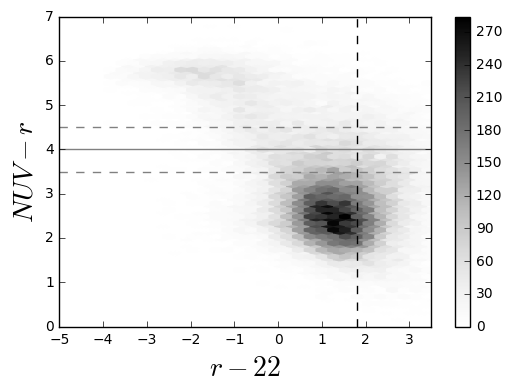

In [6]:
# NUV - r color
filament = (nsa.RA > 192.) & (nsa.RA < 212) & (nsa.DEC > 17.) & (nsa.DEC < 49.) & (nsa.Z*3.e5 >2400.) & (nsa.Z*3.e5 < 3000.)
nsa.nsamag=22.5-2.5*np.log10(nsa.NMGY)

NUVr=nsa.ABSMAG[:,1] - nsa.ABSMAG[:,4]
wiseflag = (wise.W4MPRO > 0.1) & (wise.W4SNR > 2.) 
r22 = nsa.nsamag[:,4]  - (wise.W4MPRO +6.620) # convert wise Vega mag to AB mag

plt.figure()
plotflag = wiseflag #& filament

hb=plt.hexbin(r22[plotflag],NUVr[plotflag],gridsize=500,cmap='Greys')
plt.colorbar(hb)
plt.xlabel('$r - 22$',fontsize=20)
plt.ylabel('$NUV - r$',fontsize=20)

plt.axvline(x=1.8,ls='--',color='k')
plt.axhline(y=4,ls='-',color='0.5')
plt.axhline(y=4.5,ls='--',color='0.5')
plt.axhline(y=3.5,ls='--',color='0.5')
plt.axis([-5,3.5,0,7])
plt.savefig('NUVr-r24.png')
# counting statistics

Ntot = sum(wiseflag)
Nred = sum(wiseflag & (r22 > 1.8))
Ngreen = sum((NUVr > 3.5) & (NUVr < 4.5))
print 'fraction of galaxies with r-22 > 1.8 = %i / %i (%.2f)'%(Nred,Ntot,1.*Nred/Ntot*100.)

print 'faction of galaxies with 3.5 < NUV-r < 4.5 = %i / %i (%.2f)'%(Ngreen,Ntot,100.*Ngreen/Ntot)

In [1]:
help(plt.arrow)

NameError: name 'plt' is not defined